In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import plotly

In [17]:
import plotly.express as px
import plotly.graph_objects as go

# Basic Regression Plot

Application of plotly to represent a simple regression model 

In [18]:
df = px.data.tips() # Load the tips dataset from plotly express

## Quick study of the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [20]:
print('SHAPE')
print(f'the dataset has {df.shape[0]} rows and {df.shape[1]} columns ')
print('')
print('DTYPES')
for col in df.columns:
    dtyp = df[col].dtype
    print(f'The column {col} is a {dtyp}')
print('')
print('NULL VALUES')
for col in df.columns:
    nullval = (df[col].isnull().sum()/len(df[col]))*100
    print(f'The column {col} has the {nullval} % of null values')


SHAPE
the dataset has 244 rows and 7 columns 

DTYPES
The column total_bill is a float64
The column tip is a float64
The column sex is a object
The column smoker is a object
The column day is a object
The column time is a object
The column size is a int64

NULL VALUES
The column total_bill has the 0.0 % of null values
The column tip has the 0.0 % of null values
The column sex has the 0.0 % of null values
The column smoker has the 0.0 % of null values
The column day has the 0.0 % of null values
The column time has the 0.0 % of null values
The column size has the 0.0 % of null values


## Use pltoply to plot a Regression Line

In [21]:
fig = px.scatter(
    df, x='total_bill', y='tip', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

# OLS for Linear Regression in Statsmodels

In [25]:

import statsmodels.api as sm

In [24]:
X = df['total_bill']
y = df['tip']

In [26]:
# To avoid the intercept of passing from 0 we add a constat value
X = sm.add_constant(X)

In [27]:
# We can now create our model
model = sm.OLS(endog = y,exog = X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 28 Feb 2026   Prob (F-statistic):           6.69e-34
Time:                        14:36:57   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

### Note

R-squared and R-squared adjusted explain how much of the variability of y is explained by our model
F-statistic measure if the model is significant the higher the better
Prob (F-statistic) it tells us if our variable are significant
Coeff it says that once total bill is 0 then the tip is 0.92 and when total bill increase of 1  this will produce an increase of 0.1 in the tip

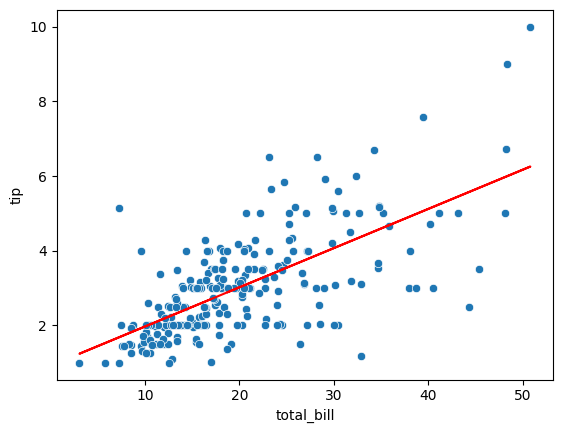

In [37]:
res=model.predict(X)

sns.scatterplot(data=df,x='total_bill',y='tip')
plt.plot(df['total_bill'],res,color = 'r');

# Scikit-learn

We can perform the same Regression by using the library scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
X1= df[['total_bill']]
y1 = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

model1 = LinearRegression()

In [42]:
model1.fit(X_train,y_train)

LinearRegression()

In [44]:
pred = model1.predict(X_test)

In [47]:
X_test['predict'] = pred
X_test

,total_bill,predict
24,19.82,3.044742
6,8.77,1.804854
153,24.55,3.575481
211,25.89,3.725838
198,13.00,2.279490
...,...,...
180,34.65,4.708771
5,25.29,3.658514
56,38.01,5.085787
125,29.80,4.164567


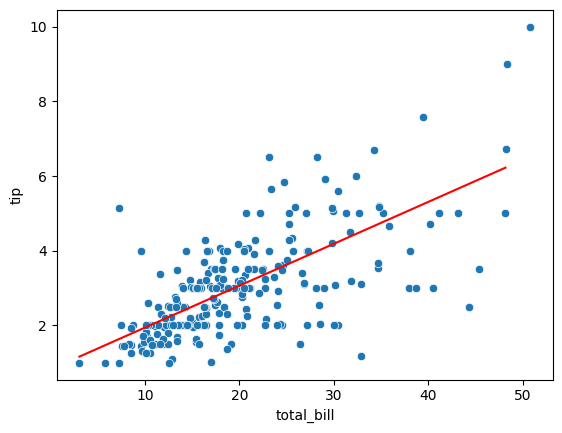

In [48]:
sns.scatterplot(data=df,x=df['total_bill'],y = df['tip'])
sns.lineplot(data = X_test,x='total_bill',y='predict',color = 'red');

# ML Regression in Dash

In [49]:
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [ ]:
# Step 1 - This creates the container for the app
app = Dash(__name__) 

#Step 2 - we are creating a dictionary of models we want to visualise
models = {
    'Regression': linear_model.LinearRegression,
    'Decision Tree': tree.DecisionTreeRegressor,
    'k-NN': neighbors.KNeighborsRegressor
}
#Step 3 create the layout
app.layout = html.Div([ # this creates the interface
    html.H4("Predicting restaurant's revenue"), # Big title on top
    html.P("Select model:"), # small description
    dcc.Dropdown( # Window menu
        id='dropdown', # it links to function below
        options=["Regression", "Decision Tree", "k-NN"], # these are the 3 options
        value='Decision Tree', #starting choice
        clearable=False #no empty in the window
    ),
    dcc.Graph(id="graph"), #create the canvas
])

@app.callback( # make the chart changable based on what we put in the dropdown
    Output("graph", "figure"), # output chart
    Input("dropdown", "value") #input dropdown
)
def train_and_display(name): #this activate when it change the model

# input data
    df = px.data.tips()
    X = df.total_bill.values[:, None] # transform in a 2D - takes all the row and add another dimension
    y = df.tip

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42
    )

    # definition of the model
    model2 = models[name]()
    model2.fit(X_train, y_train)

# we create the x axis and y axis based on predictions
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = model2.predict(x_range)

#create the chart
    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train,
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test,
                   name='test', mode='markers'),
        go.Scatter(x=x_range.squeeze(), y=y_range,
                   name='prediction')
    ])

    return fig

app.run(debug=True)

# Model Generalisation on Unseen data

In [59]:
df1 = px.data.tips()
X2 = df.total_bill.to_numpy()[:, None]
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, df.tip, random_state=0)

In [60]:
model3 = LinearRegression()
model3.fit(X1_train, y1_train)

x_range = np.linspace(X1.min(), X1.max(), 100)
y_range = model3.predict(x_range.reshape(-1, 1))

fig2 = go.Figure([
    go.Scatter(x=X1_train.squeeze(), y=y1_train, name='train', mode='markers'),
    go.Scatter(x=X1_test.squeeze(), y=y1_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig2.show()

# Comparing different kNN models parameters

Besides linear regression, the same dataset can also be modeled using k-Nearest Neighbors (kNN). When predicting the target for a new observation, this algorithm calculates either a simple or weighted average of the nearest neighbors. To illustrate the effect of these two approaches, we train a kNN model with both averaging methods and visualize the results similarly to the previous regression plot.

In [64]:

from sklearn.neighbors import KNeighborsRegressor

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100)

# Model #1
knn_dist = KNeighborsRegressor(10, weights='distance')
knn_dist.fit(X, df.tip)
y_dist = knn_dist.predict(x_range.reshape(-1, 1))

# Model #2
knn_uni = KNeighborsRegressor(10, weights='uniform')
knn_uni.fit(X, df.tip)
y_uni = knn_uni.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip', color='sex', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_uni, name='Weights: Uniform'))
fig.add_traces(go.Scatter(x=x_range, y=y_dist, name='Weights: Distance'))
fig.show()

# Displaying PolynomialFeatures using $\LaTeX$

Observe that while linear regression produces a straight line, k-Nearest Neighbors (kNN) can model more flexible, non-linear patterns. Additionally, you can extend linear regression into polynomial regression using scikit-learn’s PolynomialFeatures, which allows the model to fit coefficients for your features raised to different powers — in our example, n = 1, 2, 3, 4.

With Plotly, displaying LaTeX-style equations in titles or legends is straightforward: just enclose the equation within $…$. This lets you visualize the coefficients estimated by your polynomial regression directly on the plot.

In [65]:

from sklearn.preprocessing import PolynomialFeatures

def format_coefs(coefs):
    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
    equation = "$" +  " + ".join(equation_list) + "$"

    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
    for old, new in replace_map.items():
        equation = equation.replace(old, new)

    return equation

df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

fig = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree)
    poly.fit(X)
    X_poly = poly.transform(X)
    x_range_poly = poly.transform(x_range)

    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, df.tip)
    y_poly = model.predict(x_range_poly)

    equation = format_coefs(model.coef_.round(2))
    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))

fig.show()

# 3D regression surface with px.scatter_3d and go.Surface

In [63]:
from sklearn.svm import SVR

In [66]:
mesh_size = .02
margin = 0

df = px.data.iris()

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Condition the model on sepal width and length, predict the petal width
model = SVR(C=1.)
model.fit(X, y)

# Create a mesh grid on which we will run our model
x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

C:\Users\matti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



# Visualizing coefficients for multiple linear regression (MLR)

In [67]:
df = px.data.iris()

X = df.drop(columns=['petal_width', 'species_id'])
X = pd.get_dummies(X, columns=['species'], prefix_sep='=')
y = df['petal_width']

model = LinearRegression()
model.fit(X, y)

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting petal width'
)
fig.show()

# Simple actual vs predicted plot

In [68]:
df = px.data.iris()
X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'ground truth', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

# Enhanced prediction error analysis using plotly.express

In [69]:
f = px.data.iris()

# Split data into training and test splits
train_idx, test_idx = train_test_split(df.index, test_size=.25, random_state=0)
df['split'] = 'train'
df.loc[test_idx, 'split'] = 'test'

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']
X_train = df.loc[train_idx, ['sepal_width', 'sepal_length']]
y_train = df.loc[train_idx, 'petal_width']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X_train, y_train)
df['prediction'] = model.predict(X)

fig = px.scatter(
    df, x='petal_width', y='prediction',
    marginal_x='histogram', marginal_y='histogram',
    color='split', trendline='ols'
)
fig.update_traces(histnorm='probability', selector={'type':'histogram'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

# Residual plots

In [70]:
df = px.data.iris()

# Split data into training and test splits
train_idx, test_idx = train_test_split(df.index, test_size=.25, random_state=0)
df['split'] = 'train'
df.loc[test_idx, 'split'] = 'test'

X = df[['sepal_width', 'sepal_length']]
X_train = df.loc[train_idx, ['sepal_width', 'sepal_length']]
y_train = df.loc[train_idx, 'petal_width']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X_train, y_train)
df['prediction'] = model.predict(X)
df['residual'] = df['prediction'] - df['petal_width']

fig = px.scatter(
    df, x='prediction', y='residual',
    marginal_y='violin',
    color='split', trendline='ols'
)
fig.show()

# Visualize regularization across cross-validation folds

In [71]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

N_FOLD = 6

# Load and preprocess the data
df = px.data.gapminder()
X = df.drop(columns=['lifeExp', 'iso_num'])
X = pd.get_dummies(X, columns=['country', 'continent', 'iso_alpha'])
y = df['lifeExp']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model to predict life expectancy
model = LassoCV(cv=N_FOLD)
model.fit(X_scaled, y)
mean_alphas = model.mse_path_.mean(axis=-1)

fig = go.Figure([
    go.Scatter(
        x=model.alphas_, y=model.mse_path_[:, i],
        name=f"Fold: {i+1}", opacity=.5, line=dict(dash='dash'),
        hovertemplate="alpha: %{x} <br>MSE: %{y}"
    )
    for i in range(N_FOLD)
])
fig.add_traces(go.Scatter(
    x=model.alphas_, y=mean_alphas,
    name='Mean', line=dict(color='black', width=3),
    hovertemplate="alpha: %{x} <br>MSE: %{y}",
))

fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=model.alpha_, y0=0,
    x1=model.alpha_, y1=1,
    yref='paper'
)

fig.update_layout(
    xaxis=dict(
        title=dict(
            text='alpha'
        ),
        type='log'
    ),
    yaxis=dict(
        title=dict(
            text='Mean Square Error (MSE)'
        )
    ),
)
fig.show()

# Grid search visualization using px.density_heatmap and px.box

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

N_FOLD = 6

# Load and shuffle dataframe
df = px.data.iris()
df = df.sample(frac=1, random_state=0)

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Define and fit the grid
model = DecisionTreeRegressor()
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': range(2, 5)
}
grid = GridSearchCV(model, param_grid, cv=N_FOLD)
grid.fit(X, y)
grid_df = pd.DataFrame(grid.cv_results_)

# Convert the wide format of the grid into the long format
# accepted by plotly.express
melted = (
    grid_df
    .rename(columns=lambda col: col.replace('param_', ''))
    .melt(
        value_vars=[f'split{i}_test_score' for i in range(N_FOLD)],
        id_vars=['mean_test_score', 'mean_fit_time', 'criterion', 'max_depth'],
        var_name="cv_split",
        value_name="r_squared"
    )
)

# Format the variable names for simplicity
melted['cv_split'] = (
    melted['cv_split']
    .str.replace('_test_score', '')
    .str.replace('split', '')
)

# Single function call to plot each figure
fig_hmap = px.density_heatmap(
    melted, x="max_depth", y='criterion',
    histfunc="sum", z="r_squared",
    title='Grid search results on individual fold',
    hover_data=['mean_fit_time'],
    facet_col="cv_split", facet_col_wrap=3,
    labels={'mean_test_score': "mean_r_squared"}
)

fig_box = px.box(
    melted, x='max_depth', y='r_squared',
    title='Grid search results ',
    hover_data=['mean_fit_time'],
    points='all',
    color="criterion",
    hover_name='cv_split',
    labels={'mean_test_score': "mean_r_squared"}
)

# Display
fig_hmap.show()
fig_box.show();

C:\Users\matti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


36 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\matti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pac